EDA Projects
Census Varibles

In [6]:
# Import pandas with alias
import pandas as pd

# Read the census dataframe
census = pd.read_csv('census_data.csv', index_col=0)

print(census.head(5))
print(census.dtypes)
print(census.birth_year.unique())
census['birth_year'] = census['birth_year'].replace(['missing'],1967)
print(census['birth_year'].unique())

census['birth_year'] = census['birth_year'].astype(int)
print(census.dtypes)
print(census.birth_year.mean())

census['higher_tax'] = pd.Categorical(census['higher_tax'],
['strongly disagree','disagree','neutral','agree','strongly agree'], ordered =True)
print(census['higher_tax'].unique())
census['higher_tax'] = census['higher_tax'].cat.codes
print(census['higher_tax'].median()) 

census_extra = pd.get_dummies(census, columns=['marital_status'])
print(census_extra.head())

census['marital_status'] = pd.Categorical(census['marital_status'],
['single','divorced','married'], ordered = False)
census['marital_status'] = census['marital_status'].cat.codes
print(census.head())



  first_name  last_name birth_year  voted  num_children  income_year  \
0     Denise      Ratke       2005  False             0     92129.41   
1       Hali  Cummerata       1987  False             0     75649.17   
2    Salomon        Orn       1992   True             2    166313.45   
3     Sarina   Schiller       1965  False             2     71704.81   
4       Gust  Abernathy       1945  False             2    143316.08   

       higher_tax marital_status  
0        disagree         single  
1         neutral       divorced  
2           agree         single  
3  strongly agree        married  
4           agree        married  
first_name         object
last_name          object
birth_year         object
voted                bool
num_children        int64
income_year       float64
higher_tax         object
marital_status     object
dtype: object
['2005' '1987' '1992' '1965' '1945' '1951' '1963' '1949' '1950' '1971'
 '2007' '1944' '1995' '1973' '1946' '1954' '1994' '1989' '1947' 

EDA: Diagnosing Diabetes

In [7]:
import pandas as pd
import numpy as np


diabetes = pd.read_csv('diabetes.csv')
print(diabetes.head(10))
print(diabetes.info())
#ordinarly prints all columns within a tuple of python list, but len adds total features
print(len(diabetes.columns))
print(len(diabetes))
#prints the dimension of dataframe x axis and y axis
print(diabetes.shape)

# Checks for Nulls
# This code creates a dataframe with all colunms and there null count. While this code creates a dataframe with all rows with null values: diabetes[diabetes.isnull().any(axis=1)]
print(diabetes.isnull().sum()) 


#This will check all the standard statistics(mean,mode,median,percentilage, max and min) of all columns, catageorical varible likely will be NAN.
summary_statistics = diabetes.describe()
print(summary_statistics)
# Replaces zeros with numpy's NAN within selected columns
diabetes[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = \
  diabetes[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)
print(diabetes.isnull().sum())
print(diabetes[diabetes.isnull().any(axis = 1)])
print(diabetes.dtypes)
print(diabetes.Outcome.unique())
diabetes['Outcome'] = diabetes.Outcome.replace('O', 0).astype('int64')

#Omitting unnecessary columns/rows
Ommit_Insulin = diabetes.drop('Insulin', axis=1)
print(Ommit_Insulin)




   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age Outcome  
0                     0.627   50       1  
1                     0.351   31       0  
2                     0.672   32       1  
3                     0.167   21   

EDA Visuals and Summaries of Categoricals/Numeric Variables
EXploring Student Data Project

  address  absences     Mjob      Fjob  math_grade
0       U         6  at_home   teacher           6
1       U         4  at_home     other           6
2       U        10  at_home     other          10
3       U         2   health  services          15
4       U         4    other     other          10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   address     395 non-null    object
 1   absences    395 non-null    int64 
 2   Mjob        395 non-null    object
 3   Fjob        395 non-null    object
 4   math_grade  395 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 15.6+ KB
None
       address    absences   Mjob   Fjob  math_grade
count      395  395.000000    395    395  395.000000
unique       2         NaN      5      5         NaN
top          U         NaN  other  other         NaN
freq       307         NaN    141    217  

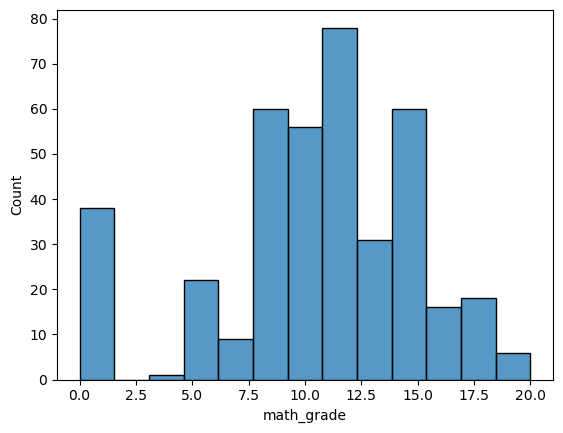

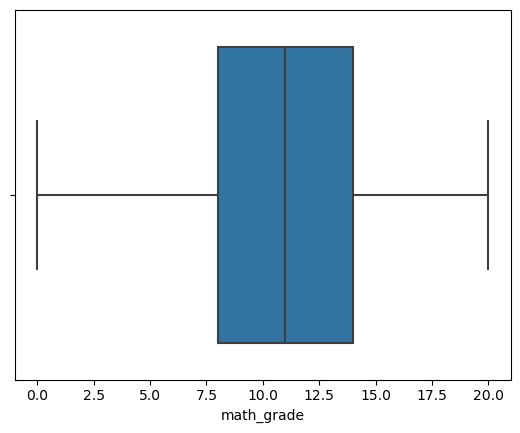

Mjob
other       141
services    103
at_home      59
teacher      58
health       34
Name: count, dtype: int64
Mjob
other       0.356962
services    0.260759
at_home     0.149367
teacher     0.146835
health      0.086076
Name: proportion, dtype: float64


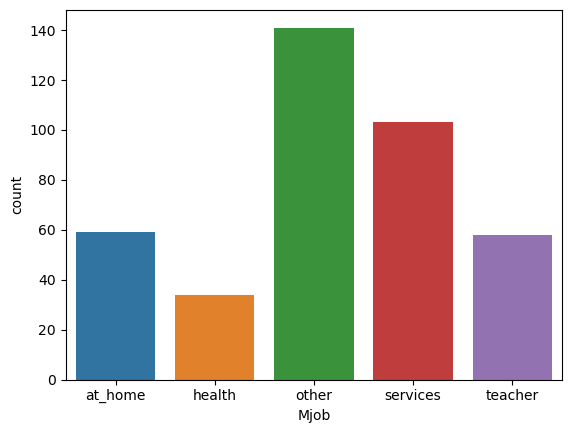

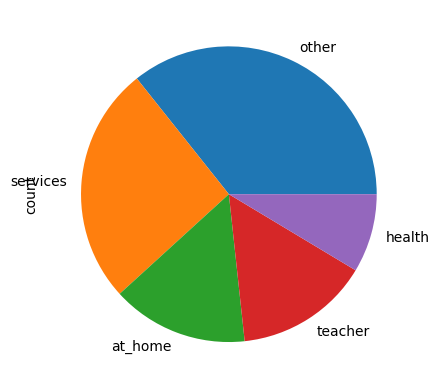

In [7]:
# Load libraries
import pandas as pd
from numpy import absolute, mean

import matplotlib.pyplot as plt
import seaborn as sns

# Import data
students = pd.read_csv('students.csv')

# Print first few rows of data
print(students.head())
print(students.info())
# Print summary statistics for all columns
print(students.describe(include = 'all'))

# Calculate mean
print(f'Your mean is {students.math_grade.mean()}')
# Calculate median
print(f'Your median is {students.math_grade.median()}')
# Calculate mode
print(f'Your mode is {students.math_grade.mode()[0]}')
# Calculate range
print(f'Your range is {students.math_grade.max()-students.math_grade.min()}')
# Calculate standard deviation
print(f'Your Standard Deviation is {students.math_grade.std()}')
# Calculate MAD
print(f'Your Mean Absolute Deviation is {mean(absolute(students.math_grade - mean(students.math_grade, 0)), 0)}')
# Create a histogram of math grades
sns.histplot(x='math_grade', data=students)

plt.show()
plt.clf()

# Create a box plot of math grades
sns.boxplot(x='math_grade', data=students)

plt.show()
plt.clf()

# Calculate number of students with mothers in each job category
print(students.Mjob.value_counts())
# Calculate proportion of students with mothers in each job category
print(students.Mjob.value_counts(normalize=True))
# Create bar chart of Mjob
sns.countplot(x='Mjob', data=students)
plt.show()
plt.clf()

# Create pie chart of Mjob
students.Mjob.value_counts().plot.pie()
plt.show()